In [1]:
import pandas as pd
import glob
from collections import defaultdict
import numpy as np
import json


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import seaborn as sns
sns.set(style='whitegrid', palette='muted')

from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor, as_completed

In [2]:
!mkdir -p plots

In [3]:
results_dir = "results/1648838189"
result_name = "5000-ce"

In [4]:
# Parameters
result_name = "5000-ce"
results_dir = "results/1648838189"


In [5]:
forecast_files = glob.glob(f"{results_dir}/forecast.*.jsonl")

key_to_timestamps = defaultdict(list)
key_to_last_seqnos = defaultdict(list)
key_to_last_seqno_to_forecast = defaultdict(dict)
for path in tqdm(forecast_files):
    with open(path) as f:
        for line in f:
            loaded = json.loads(line)
            key_id = str(loaded["key_id"])
            key_to_timestamps[key_id].append(loaded["processing_time"])
            key_to_last_seqnos[key_id].append(loaded["last_seqno"])
            key_to_last_seqno_to_forecast[key_id][loaded["last_seqno"]] = loaded["forecast"]


  0%|                                                                      | 0/16 [00:00<?, ?it/s]

  6%|███▉                                                          | 1/16 [00:09<02:21,  9.46s/it]

 12%|███████▊                                                      | 2/16 [00:19<02:15,  9.71s/it]

 19%|███████████▋                                                  | 3/16 [00:28<02:04,  9.55s/it]

 25%|███████████████▌                                              | 4/16 [00:38<01:56,  9.68s/it]

 31%|███████████████████▍                                          | 5/16 [00:47<01:45,  9.58s/it]

 38%|███████████████████████▎                                      | 6/16 [00:58<01:37,  9.74s/it]

 44%|███████████████████████████▏                                  | 7/16 [01:07<01:26,  9.63s/it]

 50%|███████████████████████████████                               | 8/16 [01:20<01:25, 10.67s/it]

 56%|██████████████████████████████████▉                           | 9/16 [01:29<01:12, 10.34s/it]

 62%|██████████████████████████████████████▏                      | 10/16 [01:39<01:01, 10.17s/it]

 69%|█████████████████████████████████████████▉                   | 11/16 [01:49<00:49,  9.97s/it]

 75%|█████████████████████████████████████████████▊               | 12/16 [01:59<00:40, 10.04s/it]

 81%|█████████████████████████████████████████████████▌           | 13/16 [02:09<00:29,  9.91s/it]

 88%|█████████████████████████████████████████████████████▍       | 14/16 [02:19<00:19,  9.96s/it]

 94%|█████████████████████████████████████████████████████████▏   | 15/16 [02:28<00:09,  9.86s/it]

100%|█████████████████████████████████████████████████████████████| 16/16 [02:38<00:00,  9.84s/it]

100%|█████████████████████████████████████████████████████████████| 16/16 [02:38<00:00,  9.91s/it]

In [6]:
source_files = glob.glob(f"{results_dir}/source.*.jsonl")
key_to_source_series = defaultdict(list)
key_to_source_timestamps = defaultdict(list)
key_to_source_seqno = defaultdict(list)
for path in source_files:
    with open(path) as f:
        for line in tqdm(f):
            loaded = json.loads(line)
            for entry in loaded:
                key_id = str(entry["key_id"])
                key_to_source_series[key_id].append(entry["value"])
                key_to_source_timestamps[key_id].append(entry["ingest_time"])
                key_to_source_seqno[key_id].append(entry["seq_no"])


0it [00:00, ?it/s]

1it [00:00,  3.88it/s]

15it [00:00, 51.92it/s]

29it [00:00, 80.63it/s]

43it [00:00, 98.91it/s]

57it [00:00, 110.41it/s]

71it [00:00, 117.07it/s]

85it [00:00, 121.53it/s]

98it [00:00, 123.83it/s]

111it [00:01, 125.32it/s]

125it [00:01, 127.19it/s]

138it [00:01, 127.01it/s]

151it [00:01, 126.97it/s]

165it [00:01, 127.92it/s]

178it [00:01, 127.01it/s]

191it [00:01, 127.58it/s]

204it [00:01, 126.96it/s]

218it [00:01, 127.94it/s]

231it [00:02, 128.25it/s]

244it [00:02, 126.13it/s]

258it [00:02, 127.37it/s]

271it [00:02, 125.51it/s]

284it [00:02, 124.28it/s]

297it [00:02, 124.53it/s]

310it [00:02, 122.55it/s]

323it [00:02, 121.20it/s]

336it [00:02, 121.73it/s]

349it [00:02, 122.38it/s]

362it [00:03, 119.88it/s]

375it [00:03, 120.37it/s]

388it [00:03, 120.70it/s]

401it [00:03, 120.99it/s]

414it [00:03, 118.52it/s]

426it [00:03, 118.60it/s]

439it [00:03, 119.57it/s]

452it [00:03, 120.23it/s]

465it [00:03, 118.46it/s]

477it [00:04, 117.32it/s]

490it [00:04, 118.69it/s]

503it [00:04, 119.41it/s]

516it [00:04, 119.94it/s]

528it [00:04, 117.69it/s]

540it [00:04, 116.52it/s]

552it [00:04, 117.37it/s]

565it [00:04, 118.51it/s]

577it [00:04, 118.89it/s]

590it [00:05, 119.65it/s]

602it [00:05, 116.65it/s]

614it [00:05, 115.87it/s]

627it [00:05, 117.19it/s]

640it [00:05, 118.12it/s]

653it [00:05, 119.05it/s]

665it [00:05, 118.81it/s]

678it [00:05, 119.23it/s]

690it [00:05, 114.90it/s]

702it [00:05, 115.63it/s]

714it [00:06, 116.67it/s]

726it [00:06, 117.32it/s]

738it [00:06, 117.81it/s]

750it [00:06, 118.17it/s]

762it [00:06, 118.24it/s]

774it [00:06, 115.34it/s]

786it [00:06, 114.26it/s]

798it [00:06, 115.77it/s]

810it [00:06, 116.93it/s]

823it [00:07, 117.91it/s]

835it [00:07, 118.47it/s]

847it [00:07, 118.75it/s]

859it [00:07, 117.69it/s]

871it [00:07, 118.12it/s]

883it [00:07, 111.75it/s]

895it [00:07, 112.36it/s]

907it [00:07, 114.36it/s]

919it [00:07, 115.78it/s]

932it [00:07, 117.09it/s]

944it [00:08, 116.90it/s]

956it [00:08, 117.70it/s]

968it [00:08, 118.27it/s]

980it [00:08, 118.45it/s]

992it [00:08, 114.02it/s]

1004it [00:08, 111.76it/s]

1016it [00:08, 113.58it/s]

1028it [00:08, 115.07it/s]

1040it [00:08, 115.37it/s]

1052it [00:08, 116.52it/s]

1064it [00:09, 116.93it/s]

1076it [00:09, 117.30it/s]

1088it [00:09, 117.61it/s]

1100it [00:09, 117.75it/s]

1112it [00:09, 118.30it/s]

1124it [00:09, 113.21it/s]

1136it [00:09, 110.73it/s]

1148it [00:09, 112.54it/s]

1160it [00:09, 113.99it/s]

1172it [00:10, 114.98it/s]

1184it [00:10, 115.79it/s]

1196it [00:10, 116.27it/s]

1208it [00:10, 116.91it/s]

1220it [00:10, 116.29it/s]

1232it [00:10, 116.63it/s]

1244it [00:18,  4.66it/s] 

1256it [00:18,  6.55it/s]

1268it [00:19,  9.11it/s]

1279it [00:19, 12.27it/s]

1291it [00:19, 16.87it/s]

1303it [00:19, 22.79it/s]

1315it [00:19, 30.15it/s]

1327it [00:19, 38.84it/s]

1339it [00:19, 48.61it/s]

1351it [00:19, 59.03it/s]

1363it [00:19, 69.37it/s]

1375it [00:20, 79.05it/s]

1387it [00:20, 87.66it/s]

1399it [00:20, 94.76it/s]

1411it [00:20, 100.51it/s]

1423it [00:20, 104.91it/s]

1435it [00:20, 105.59it/s]

1447it [00:20, 106.58it/s]

1459it [00:20, 109.65it/s]

1471it [00:20, 111.16it/s]

1483it [00:20, 113.15it/s]

1495it [00:21, 114.35it/s]

1507it [00:21, 115.07it/s]

1519it [00:21, 115.71it/s]

1531it [00:21, 116.10it/s]

1543it [00:21, 115.88it/s]

1555it [00:21, 116.26it/s]

1567it [00:21, 115.88it/s]

1579it [00:21, 116.33it/s]

1591it [00:21, 116.68it/s]

1603it [00:21, 116.95it/s]

1615it [00:22, 116.52it/s]

1627it [00:22, 114.13it/s]

1639it [00:22, 114.42it/s]

1651it [00:22, 114.67it/s]

1663it [00:22, 115.72it/s]

1675it [00:22, 115.91it/s]

1687it [00:22, 115.95it/s]

1699it [00:22, 116.44it/s]

1711it [00:22, 116.73it/s]

1723it [00:23, 116.86it/s]

1735it [00:23, 117.04it/s]

1747it [00:23, 116.46it/s]

1759it [00:23, 116.73it/s]

1771it [00:23, 116.90it/s]

1783it [00:23, 117.22it/s]

1795it [00:23, 117.16it/s]

1807it [00:23, 117.06it/s]

1819it [00:23, 117.01it/s]

1831it [00:23, 112.40it/s]

1843it [00:24, 110.43it/s]

1855it [00:24, 112.23it/s]

1867it [00:24, 113.70it/s]

1879it [00:24, 114.73it/s]

1891it [00:24, 115.37it/s]

1903it [00:24, 116.00it/s]

1915it [00:24, 116.07it/s]

1927it [00:24, 116.36it/s]

1939it [00:24, 115.96it/s]

1951it [00:25, 116.25it/s]

1963it [00:25, 116.64it/s]

1975it [00:25, 116.66it/s]

1987it [00:25, 116.72it/s]

1999it [00:25, 116.69it/s]

2011it [00:25, 116.70it/s]

2023it [00:25, 115.55it/s]

2035it [00:25, 115.82it/s]

2047it [00:25, 115.88it/s]

2059it [00:25, 115.95it/s]

2071it [00:26, 104.66it/s]

2082it [00:26, 105.35it/s]

2094it [00:26, 108.30it/s]

2106it [00:26, 110.62it/s]

2118it [00:26, 111.79it/s]

2130it [00:26, 113.16it/s]

2142it [00:26, 114.10it/s]

2154it [00:26, 115.00it/s]

2166it [00:26, 115.54it/s]

2178it [00:27, 115.94it/s]

2190it [00:27, 116.25it/s]

2202it [00:27, 116.50it/s]

2214it [00:27, 115.77it/s]

2226it [00:27, 115.83it/s]

2238it [00:27, 116.17it/s]

2250it [00:27, 116.22it/s]

2262it [00:27, 116.41it/s]

2274it [00:27, 116.49it/s]

2286it [00:27, 116.43it/s]

2298it [00:28, 115.91it/s]

2310it [00:28, 115.99it/s]

2322it [00:28, 116.19it/s]

2334it [00:28, 98.99it/s] 

2345it [00:28, 99.05it/s]

2357it [00:28, 103.84it/s]

2369it [00:28, 107.51it/s]

2381it [00:28, 109.84it/s]

2393it [00:28, 112.18it/s]

2405it [00:29, 113.88it/s]

2417it [00:29, 114.95it/s]

2429it [00:29, 115.85it/s]

2441it [00:29, 116.55it/s]

2453it [00:29, 117.29it/s]

2465it [00:29, 117.45it/s]

2477it [00:29, 117.10it/s]

2489it [00:29, 117.60it/s]

2501it [00:29, 118.16it/s]

2513it [00:29, 118.63it/s]

2525it [00:30, 118.83it/s]

2537it [00:30, 118.67it/s]

2549it [00:30, 118.90it/s]

2561it [00:30, 119.07it/s]

2573it [00:30, 118.52it/s]

2585it [00:30, 118.82it/s]

2597it [00:30, 119.09it/s]

2609it [00:30, 119.02it/s]

2621it [00:30, 119.22it/s]

2633it [00:31, 104.00it/s]

2644it [00:31, 104.24it/s]

2656it [00:31, 108.46it/s]

2668it [00:31, 111.18it/s]

2680it [00:31, 113.46it/s]

2692it [00:31, 115.32it/s]

2704it [00:31, 116.43it/s]

2716it [00:31, 117.40it/s]

2728it [00:31, 118.08it/s]

2741it [00:31, 118.90it/s]

2753it [00:32, 118.52it/s]

2765it [00:32, 118.58it/s]

2777it [00:32, 118.74it/s]

2789it [00:32, 118.94it/s]

2801it [00:32, 119.03it/s]

2813it [00:32, 119.17it/s]

2825it [00:32, 119.14it/s]

2837it [00:32, 119.23it/s]

2849it [00:32, 119.05it/s]

2861it [00:32, 119.23it/s]

2873it [00:33, 119.32it/s]

2885it [00:33, 119.49it/s]

2897it [00:33, 119.39it/s]

2909it [00:33, 119.54it/s]

2921it [00:33, 119.09it/s]

2933it [00:33, 118.85it/s]

2945it [00:33, 118.17it/s]

2957it [00:33, 118.27it/s]

2969it [00:33, 101.86it/s]

2980it [00:33, 103.64it/s]

2992it [00:34, 107.24it/s]

3004it [00:34, 110.39it/s]

3016it [00:34, 112.25it/s]

3028it [00:34, 113.95it/s]

3040it [00:34, 114.84it/s]

3052it [00:34, 115.98it/s]

3064it [00:34, 116.90it/s]

3076it [00:34, 117.57it/s]

3088it [00:34, 117.80it/s]

3100it [00:35, 118.01it/s]

3112it [00:35, 118.35it/s]

3124it [00:35, 118.42it/s]

3136it [00:35, 117.80it/s]

3148it [00:35, 117.96it/s]

3160it [00:35, 118.05it/s]

3172it [00:35, 118.19it/s]

3184it [00:35, 118.29it/s]

3196it [00:35, 118.31it/s]

3208it [00:35, 118.71it/s]

3220it [00:36, 118.40it/s]

3232it [00:36, 118.64it/s]

3244it [00:36, 118.72it/s]

3256it [00:36, 118.74it/s]

3268it [00:36, 118.68it/s]

3280it [00:36, 118.72it/s]

3292it [00:36, 119.04it/s]

3304it [00:36, 119.01it/s]

3316it [00:36, 118.47it/s]

3328it [00:36, 118.51it/s]

3340it [00:37, 100.48it/s]

3351it [00:37, 98.53it/s] 

3363it [00:37, 103.31it/s]

3375it [00:37, 107.20it/s]

3387it [00:37, 109.99it/s]

3399it [00:37, 111.79it/s]

3411it [00:37, 113.62it/s]

3423it [00:37, 115.09it/s]

3435it [00:37, 116.27it/s]

3447it [00:38, 116.77it/s]

3459it [00:38, 117.06it/s]

3471it [00:38, 117.32it/s]

3483it [00:38, 117.61it/s]

3495it [00:38, 117.24it/s]

3507it [00:38, 117.67it/s]

3519it [00:38, 118.10it/s]

3531it [00:38, 118.16it/s]

3543it [00:38, 118.36it/s]

3555it [00:38, 118.29it/s]

3567it [00:39, 118.55it/s]

3579it [00:39, 118.51it/s]

3591it [00:39, 117.75it/s]

3603it [00:39, 118.07it/s]

3615it [00:39, 118.42it/s]

3627it [00:39, 118.55it/s]

3639it [00:39, 118.53it/s]

3651it [00:39, 118.65it/s]

3664it [00:39, 119.13it/s]

3676it [00:39, 119.01it/s]

3688it [00:40, 118.30it/s]

3700it [00:40, 118.29it/s]

3712it [00:40, 118.49it/s]

3724it [00:40, 118.39it/s]

3736it [00:40, 118.37it/s]

3748it [00:40, 118.36it/s]

3760it [00:40, 105.88it/s]

3771it [00:40, 99.30it/s] 

3783it [00:40, 103.76it/s]

3795it [00:41, 107.16it/s]

3807it [00:41, 109.90it/s]

3819it [00:41, 111.88it/s]

3831it [00:41, 113.31it/s]

3843it [00:41, 114.75it/s]

3855it [00:41, 115.48it/s]

3867it [00:41, 115.27it/s]

3879it [00:41, 116.54it/s]

3891it [00:41, 116.65it/s]

3903it [00:41, 116.73it/s]

3915it [00:42, 116.84it/s]

3927it [00:42, 116.92it/s]

3939it [00:42, 116.95it/s]

3951it [00:42, 117.02it/s]

3963it [00:42, 116.23it/s]

3975it [00:42, 116.45it/s]

3987it [00:42, 116.52it/s]

3999it [00:42, 116.49it/s]

4011it [00:42, 116.56it/s]

4023it [00:42, 117.17it/s]

4035it [00:43, 117.13it/s]

4047it [00:43, 117.14it/s]

4059it [00:43, 116.59it/s]

4071it [00:43, 116.59it/s]

4083it [00:43, 116.85it/s]

4095it [00:43, 116.85it/s]

4107it [00:43, 116.94it/s]

4119it [00:43, 117.04it/s]

4131it [00:43, 117.30it/s]

4143it [00:44, 116.80it/s]

4155it [00:44, 116.86it/s]

4167it [00:44, 117.02it/s]

4179it [00:44, 117.12it/s]

4191it [00:44, 116.99it/s]

4203it [00:44, 116.90it/s]

4215it [00:44, 117.14it/s]

4227it [00:44, 117.01it/s]

4239it [00:44, 100.14it/s]

4250it [00:45, 96.50it/s] 

4262it [00:45, 101.06it/s]

4274it [00:45, 104.72it/s]

4286it [00:45, 107.99it/s]

4298it [00:45, 110.40it/s]

4310it [00:45, 112.22it/s]

4322it [00:45, 112.96it/s]

4334it [00:45, 113.90it/s]

4346it [00:45, 114.37it/s]

4358it [00:45, 114.44it/s]

4370it [00:46, 114.82it/s]

4382it [00:46, 115.32it/s]

4394it [00:46, 115.67it/s]

4406it [00:46, 115.84it/s]

4418it [00:46, 115.16it/s]

4430it [00:46, 115.52it/s]

4442it [00:46, 115.91it/s]

4454it [00:46, 115.95it/s]

4466it [00:46, 116.13it/s]

4478it [00:46, 116.31it/s]

4490it [00:47, 116.27it/s]

4502it [00:47, 116.31it/s]

4514it [00:47, 115.60it/s]

4526it [00:47, 115.93it/s]

4538it [00:47, 116.09it/s]

4550it [00:47, 116.11it/s]

4562it [00:47, 116.07it/s]

4574it [00:47, 116.36it/s]

4586it [00:47, 116.34it/s]

4598it [00:48, 115.56it/s]

4610it [00:48, 116.14it/s]

4622it [00:48, 116.80it/s]

4634it [00:48, 116.91it/s]

4646it [00:48, 116.59it/s]

4658it [00:48, 116.30it/s]

4670it [00:48, 116.46it/s]

4682it [00:48, 116.58it/s]

4694it [00:48, 115.98it/s]

4706it [00:48, 116.06it/s]

4718it [00:49, 116.22it/s]

4730it [00:49, 116.29it/s]

4742it [00:49, 116.37it/s]

4754it [00:49, 116.51it/s]

4766it [00:49, 116.85it/s]

4778it [00:49, 96.10it/s] 

4789it [00:49, 96.51it/s]

4801it [00:49, 101.14it/s]

4813it [00:49, 105.20it/s]

4825it [00:50, 108.32it/s]

4837it [00:50, 110.62it/s]

4849it [00:50, 112.25it/s]

4861it [00:50, 113.72it/s]

4873it [00:50, 113.66it/s]

4885it [00:50, 114.83it/s]

4897it [00:50, 115.44it/s]

4909it [00:50, 115.94it/s]

4921it [00:50, 116.38it/s]

4933it [00:51, 116.60it/s]

4945it [00:51, 116.59it/s]

4957it [00:51, 117.03it/s]

4969it [00:51, 116.14it/s]

4981it [00:51, 116.01it/s]

4993it [00:51, 116.20it/s]

5005it [00:51, 116.44it/s]

5017it [00:51, 116.38it/s]

5029it [00:51, 116.38it/s]

5041it [00:51, 116.26it/s]

5053it [00:52, 115.53it/s]

5065it [00:52, 115.69it/s]

5077it [00:52, 115.87it/s]

5089it [00:52, 115.91it/s]

5101it [00:52, 115.98it/s]

5113it [00:52, 115.90it/s]

5125it [00:52, 115.88it/s]

5137it [00:52, 116.23it/s]

5149it [00:52, 115.68it/s]

5161it [00:52, 116.01it/s]

5173it [00:53, 116.35it/s]

5185it [00:53, 116.50it/s]

5197it [00:53, 116.50it/s]

5209it [00:53, 116.76it/s]

5221it [00:53, 116.73it/s]

5233it [00:53, 117.05it/s]

5245it [00:53, 116.00it/s]

5257it [00:53, 116.25it/s]

5269it [00:53, 116.38it/s]

5281it [00:53, 116.76it/s]

5293it [00:54, 116.83it/s]

5305it [00:54, 116.83it/s]

5317it [00:54, 117.18it/s]

5329it [00:54, 117.72it/s]

5341it [00:54, 116.72it/s]

5353it [00:54, 116.74it/s]

5365it [00:54, 116.45it/s]

5377it [00:54, 98.49it/s] 

5388it [00:55, 92.69it/s]

5400it [00:55, 98.05it/s]

5412it [00:55, 101.64it/s]

5424it [00:55, 105.87it/s]

5436it [00:55, 109.00it/s]

5448it [00:55, 110.96it/s]

5460it [00:55, 112.61it/s]

5472it [00:55, 114.06it/s]

5484it [00:55, 114.93it/s]

5496it [00:55, 115.84it/s]

5508it [00:56, 115.55it/s]

5520it [00:56, 115.90it/s]

5532it [00:56, 116.63it/s]

5544it [00:56, 116.77it/s]

5556it [00:56, 116.79it/s]

5568it [00:56, 117.48it/s]

5580it [00:56, 117.35it/s]

5592it [00:56, 117.42it/s]

5604it [00:56, 116.60it/s]

5616it [00:56, 117.23it/s]

5628it [00:57, 117.41it/s]

5640it [00:57, 117.32it/s]

5652it [00:57, 117.43it/s]

5664it [00:57, 117.23it/s]

5676it [00:57, 117.23it/s]

5688it [00:57, 117.44it/s]

5700it [00:57, 116.47it/s]

5712it [00:57, 116.93it/s]

5724it [00:57, 117.14it/s]

5736it [00:57, 117.42it/s]

5748it [00:58, 117.45it/s]

5760it [00:58, 117.47it/s]

5772it [00:58, 117.70it/s]

5784it [00:58, 117.28it/s]

5796it [00:58, 116.07it/s]

5808it [00:58, 116.54it/s]

5820it [00:58, 116.30it/s]

5832it [00:58, 116.42it/s]

5844it [00:58, 116.49it/s]

5856it [00:59, 116.24it/s]

5868it [00:59, 116.28it/s]

5880it [00:59, 115.04it/s]

5892it [00:59, 115.40it/s]

5904it [00:59, 115.94it/s]

5916it [00:59, 116.16it/s]

5928it [00:59, 116.11it/s]

5940it [00:59, 116.63it/s]

5952it [00:59, 116.65it/s]

5964it [00:59, 116.57it/s]

5976it [01:00, 115.51it/s]

5988it [01:00, 115.76it/s]

6000it [01:00, 115.44it/s]

6012it [01:00, 115.85it/s]

6024it [01:00, 116.42it/s]

6036it [01:00, 116.61it/s]

6048it [01:00, 116.63it/s]

6060it [01:00, 86.94it/s] 

6070it [01:01, 87.54it/s]

6082it [01:01, 94.07it/s]

6094it [01:01, 99.74it/s]

6106it [01:01, 104.04it/s]

6118it [01:01, 107.19it/s]

6130it [01:01, 109.70it/s]

6142it [01:01, 111.57it/s]

6154it [01:01, 112.78it/s]

6166it [01:01, 113.77it/s]

6178it [01:01, 114.67it/s]

6190it [01:02, 115.12it/s]

6202it [01:02, 115.34it/s]

6214it [01:02, 115.59it/s]

6226it [01:02, 115.77it/s]

6238it [01:02, 115.91it/s]

6250it [01:02, 116.06it/s]

6262it [01:02, 115.80it/s]

6274it [01:02, 115.85it/s]

6286it [01:02, 115.48it/s]

6298it [01:02, 115.70it/s]

6310it [01:03, 114.49it/s]

6322it [01:03, 114.90it/s]

6334it [01:03, 115.07it/s]

6346it [01:03, 115.35it/s]

6358it [01:03, 115.41it/s]

6370it [01:03, 115.43it/s]

6382it [01:03, 114.67it/s]

6394it [01:03, 114.91it/s]

6406it [01:03, 115.20it/s]

6418it [01:04, 115.15it/s]

6430it [01:04, 115.45it/s]

6442it [01:04, 115.32it/s]

6454it [01:04, 115.82it/s]

6466it [01:04, 114.83it/s]

6478it [01:04, 115.16it/s]

6490it [01:04, 115.52it/s]

6502it [01:04, 115.84it/s]

6514it [01:04, 115.71it/s]

6526it [01:04, 116.00it/s]

6538it [01:05, 116.01it/s]

6550it [01:05, 114.85it/s]

6562it [01:05, 114.98it/s]

6574it [01:05, 115.21it/s]

6586it [01:05, 115.39it/s]

6598it [01:05, 115.41it/s]

6610it [01:05, 115.59it/s]

6622it [01:05, 114.64it/s]

6634it [01:05, 114.73it/s]

6646it [01:06, 115.26it/s]

6658it [01:06, 115.60it/s]

6670it [01:06, 115.63it/s]

6682it [01:06, 115.47it/s]

6694it [01:06, 115.79it/s]

6706it [01:06, 114.91it/s]

6718it [01:06, 115.04it/s]

6730it [01:06, 115.26it/s]

6742it [01:06, 115.71it/s]

6754it [01:06, 115.69it/s]

6766it [01:07, 115.64it/s]

6778it [01:07, 116.03it/s]

6790it [01:07, 115.04it/s]

6802it [01:07, 115.04it/s]

6814it [01:07, 106.84it/s]

6825it [01:07, 85.99it/s] 

6835it [01:07, 89.01it/s]

6847it [01:07, 94.78it/s]

6859it [01:07, 100.04it/s]

6871it [01:08, 103.84it/s]

6883it [01:08, 107.26it/s]

6895it [01:08, 109.42it/s]

6907it [01:08, 111.10it/s]

6919it [01:08, 112.09it/s]

6931it [01:08, 112.28it/s]

6943it [01:08, 112.96it/s]

6955it [01:08, 113.36it/s]

6967it [01:08, 113.48it/s]

6979it [01:09, 114.09it/s]

6991it [01:09, 113.84it/s]

7003it [01:09, 113.37it/s]

7015it [01:09, 113.50it/s]

7027it [01:09, 113.77it/s]

7039it [01:09, 114.29it/s]

7051it [01:09, 114.44it/s]

7063it [01:09, 114.57it/s]

7075it [01:09, 114.83it/s]

7087it [01:09, 114.34it/s]

7099it [01:10, 114.59it/s]

7111it [01:10, 114.71it/s]

7123it [01:10, 114.21it/s]

7135it [01:10, 114.46it/s]

7147it [01:10, 114.59it/s]

7159it [01:10, 114.48it/s]

7171it [01:10, 114.01it/s]

7183it [01:10, 114.59it/s]

7195it [01:10, 114.83it/s]

7207it [01:11, 115.19it/s]

7219it [01:11, 115.15it/s]

7231it [01:11, 115.51it/s]

7243it [01:11, 115.22it/s]

7255it [01:11, 115.28it/s]

7267it [01:11, 115.20it/s]

7279it [01:11, 115.32it/s]

7291it [01:11, 115.40it/s]

7303it [01:11, 115.23it/s]

7315it [01:11, 115.06it/s]

7327it [01:12, 114.85it/s]

7339it [01:12, 114.97it/s]

7351it [01:12, 115.23it/s]

7363it [01:12, 115.45it/s]

7375it [01:12, 115.45it/s]

7387it [01:12, 115.65it/s]

7399it [01:12, 114.53it/s]

7411it [01:12, 114.59it/s]

7423it [01:12, 114.90it/s]

7435it [01:13, 115.18it/s]

7447it [01:13, 115.64it/s]

7459it [01:13, 115.71it/s]

7471it [01:13, 115.53it/s]

7483it [01:13, 114.86it/s]

7495it [01:13, 115.00it/s]

7507it [01:13, 115.23it/s]

7519it [01:13, 115.44it/s]

7531it [01:13, 116.14it/s]

7543it [01:13, 115.70it/s]

7555it [01:14, 115.85it/s]

7567it [01:14, 115.22it/s]

7579it [01:14, 115.25it/s]

7591it [01:14, 115.20it/s]

7603it [01:14, 115.35it/s]

7615it [01:14, 115.46it/s]

7627it [01:14, 115.63it/s]

7639it [01:14, 113.93it/s]

7651it [01:14, 114.29it/s]

7663it [01:14, 114.69it/s]

7675it [01:15, 90.11it/s] 

7685it [01:15, 78.07it/s]

7695it [01:15, 82.56it/s]

7706it [01:15, 88.74it/s]

7718it [01:15, 94.83it/s]

7730it [01:15, 99.68it/s]

7742it [01:15, 103.52it/s]

7754it [01:15, 106.33it/s]

7766it [01:16, 108.49it/s]

7778it [01:16, 108.54it/s]

7790it [01:16, 110.19it/s]

7802it [01:16, 111.39it/s]

7814it [01:16, 111.90it/s]

7826it [01:16, 112.50it/s]

7838it [01:16, 113.15it/s]

7850it [01:16, 113.45it/s]

7862it [01:16, 112.25it/s]

7874it [01:17, 113.21it/s]

7886it [01:17, 113.54it/s]

7898it [01:17, 113.61it/s]

7910it [01:17, 113.81it/s]

7922it [01:17, 114.25it/s]

7934it [01:17, 113.96it/s]

7946it [01:17, 114.24it/s]

7958it [01:17, 114.32it/s]

7970it [01:17, 114.57it/s]

7982it [01:18, 114.74it/s]

7994it [01:18, 114.82it/s]

8006it [01:18, 114.73it/s]

8018it [01:18, 113.93it/s]

8030it [01:18, 114.37it/s]

8042it [01:18, 114.65it/s]

8054it [01:18, 114.86it/s]

8066it [01:18, 115.23it/s]

8078it [01:18, 114.50it/s]

8090it [01:18, 114.44it/s]

8102it [01:19, 114.74it/s]

8114it [01:19, 115.22it/s]

8126it [01:19, 115.49it/s]

8138it [01:19, 115.65it/s]

8150it [01:19, 116.16it/s]

8162it [01:19, 116.04it/s]

8174it [01:19, 115.56it/s]

8186it [01:19, 115.87it/s]

8198it [01:19, 116.04it/s]

8210it [01:19, 116.02it/s]

8222it [01:20, 116.29it/s]

8234it [01:20, 116.18it/s]

8246it [01:20, 116.36it/s]

8258it [01:20, 115.86it/s]

8270it [01:20, 115.75it/s]

8282it [01:20, 116.23it/s]

8294it [01:20, 116.30it/s]

8306it [01:20, 116.55it/s]

8318it [01:20, 116.61it/s]

8330it [01:21, 116.27it/s]

8342it [01:21, 116.60it/s]

8354it [01:21, 116.57it/s]

8366it [01:21, 116.99it/s]

8378it [01:21, 117.01it/s]

8390it [01:21, 117.15it/s]

8402it [01:21, 117.13it/s]

8414it [01:21, 116.75it/s]

8426it [01:21, 116.91it/s]

8438it [01:21, 117.00it/s]

8450it [01:22, 117.59it/s]

8462it [01:22, 117.72it/s]

8474it [01:22, 117.38it/s]

8486it [01:22, 117.16it/s]

8498it [01:22, 117.01it/s]

8510it [01:22, 117.12it/s]

8522it [01:22, 117.29it/s]

8534it [01:22, 117.58it/s]

8546it [01:22, 117.63it/s]

8558it [01:22, 116.86it/s]

8570it [01:23, 117.10it/s]

8582it [01:23, 116.67it/s]

8594it [01:23, 117.20it/s]

8606it [01:23, 117.24it/s]

8618it [01:23, 117.12it/s]

8630it [01:23, 117.23it/s]

8639it [01:23, 103.18it/s]

In [7]:
num_forecasts = pd.DataFrame([
    {"key": k, "num_forecasts": len(v)} for k, v in key_to_last_seqnos.items()
])
num_forecasts.describe()

,num_forecasts
count,5000.000000
mean,10.832800
std,7.824697
min,1.000000
25%,5.000000
50%,9.000000
75%,16.000000
max,27.000000


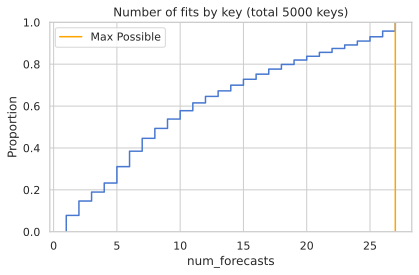

In [8]:
sns.ecdfplot(num_forecasts["num_forecasts"])
plt.title(f"Number of fits by key (total {len(num_forecasts)} keys)")
plt.axvline(27, color="orange", label="Max Possible")
plt.legend()
plt.tight_layout()
plt.savefig(f"plots/{result_name}-nfits.pdf", dpi=300)

In [9]:
num_forecasts.to_csv(f"plots/{result_name}-nfits.csv", index=None)

In [10]:
def compute_key(key):
    pred_df = (
        pd.DataFrame(
            {
                "timestamp": key_to_timestamps[key],
                "last_seqno": key_to_last_seqnos[key],
            }
        )
        .sort_values("timestamp")
        .set_index("timestamp")
    )
    true_df = (
        pd.DataFrame(
            {
                "timestamp": key_to_source_timestamps[key],
                "avg_cpu": key_to_source_series[key],
                "seq_no": key_to_source_seqno[key],
            }
        )
        .sort_values("timestamp")
        .set_index("timestamp")
    )

    merged = pd.merge_asof(
        left=true_df, right=pred_df, on="timestamp", direction="backward"
    )

    forecast = key_to_last_seqno_to_forecast[key]
    frame = pd.DataFrame(forecast)
    frame = (
        frame.T.reset_index()
        .melt("index")
        .rename(columns={"variable": "seq_delta", "index": "last_seqno"})
    )

    m = merged.dropna().reset_index(drop=True)
    m.loc[:, "seq_delta"] = (m["seq_no"] - m["last_seqno"]).astype(int)
    final = m.merge(frame, how="left", on=["last_seqno", "seq_delta"])

    mse_per_key_per_s = final.groupby(final["timestamp"].astype(int)).apply(
        lambda d: pd.Series(
            {"mse": ((d["avg_cpu"] - d["value"]) ** 2).mean(), "count": len(d)}
        )
    )
    mse_per_key_per_s["key"] = key
    return mse_per_key_per_s

with ProcessPoolExecutor() as executor:
    futs = executor.map(compute_key, key_to_timestamps.keys())
    mses = list(futs)

In [11]:
# we are dropping some keys here :sigh:
# need to figure out how to handle a key that's never fitted
# final length 4965 for 5000
all_mse = pd.concat([f.reset_index() for f in mses if len(f)])

In [12]:
all_mse.to_parquet(f"plots/{result_name}-all_mse.pq", index=None)

In [13]:
mse_by_timestamp = all_mse.groupby("timestamp").apply(
    lambda d: (d["mse"]*d["count"]).sum()/(d["count"].sum())
)

In [14]:
mse_by_timestamp.index = mse_by_timestamp.index-mse_by_timestamp.index.min()

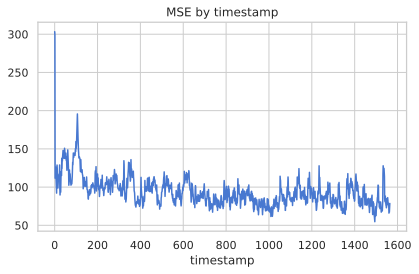

In [15]:
mse_by_timestamp.plot()
plt.title("MSE by timestamp")
plt.tight_layout()
plt.savefig(f"plots/{result_name}-mse-time.pdf", dpi=300)
mse_by_timestamp.to_csv(f"plots/{result_name}-mse-time.csv", index=True)